In [1]:
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
# chiBB = pd.read_csv('/home/const/MEGA/Physics/GrabbedFigures/LiuRapp2021/chiBB.csv')

import TMQGP as tm
import QuarkTM

import matplotlib
matplotlib.style.use('publication')
import os

import h5py

from numpy import *

/home/rfrgroup/k.maslov/venv11/lib64/python3.11/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/rfrgroup/k.maslov/venv11/lib64/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/rfrgroup/k.maslov/venv11/lib64/python3.11/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/rfrgroup/k.maslov/venv11/lib64/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [3]:
murange = array([0, 0.2, 0.4])

In [4]:
folder = '/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu2/'

In [5]:
folder0 = '/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu/4pt/0.00/'

In [6]:
fnames = ['/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu/4pt/0.00/data.hdf5', 
          '/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu2/0.20/data.hdf5', 
          '/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu2/data.hdf5']#, '0.60/data.hdf5']


In [7]:
# folder2 = '/home/const/Numerics/TMQGP/ipy/TMQGP/test/Expand/4ch_LO_data/'
folder2 = '/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/4ch_XHI/'

In [8]:
fnames2 = ['0.00/data.hdf5', '0.20/data.hdf5', '0.40/data.hdf5']#, '0.60/data.hdf5']
# 
# fnames2 = ['data.hdf5', 'data_02.hdf5', 'data_04.hdf5', 'data_06.hdf5']

In [9]:
# dfs = [h5py.File(folder+fname) for fname in fnames] 
dfs = [h5py.File(fname) for fname in fnames] 

In [10]:
dfs2 = [h5py.File(folder2+fname) for fname in fnames2] 

In [11]:
Trange = dfs[0].attrs['Trange']
Tkeys = list(dfs[0].keys())

In [12]:
erange = dfs[0]['170'].attrs['erange']
erange2 = dfs2[0]['170'].attrs['erange']

qrange1 = dfs[0]['170'].attrs['qrange']
qrange2 = dfs2[0]['170'].attrs['qrange']

In [13]:
GG0 = array(dfs[0]['170']['Q']['G'])

In [14]:
GG = array(dfs[2]['170']['Q']['G'])

In [15]:
GG2 = array(dfs2[2]['170']['Q']['G'])

(-1.0, 2.0)

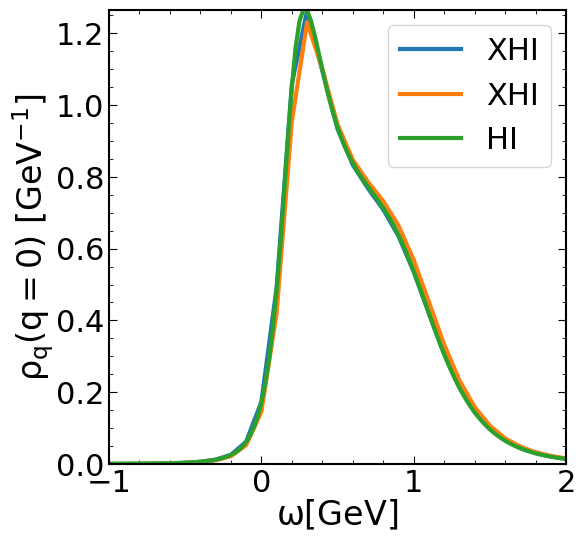

In [16]:
plt.plot(erange, -imag(GG[:,0])/pi, label='XHI')
plt.plot(erange, -imag(GG0[:,0])/pi, label='XHI')
plt.plot(erange2, -imag(GG2[:,0])/pi, label='HI')
# plt.plot(erange3, -imag(GG3[:,0]), ls='--')

plt.ylabel(r'$\rho_q(q = 0)$ [GeV$^{-1}$]')
plt.xlabel('$\omega [GeV]$')
# plt.semilogy()

plt.legend()
plt.xlim(-1, 2)
# plt.savefig('rho_q_log.pdf', bbox_inches='tight')

In [17]:
Ps_mu = []

for df in dfs:
    Ps = []
    for Tkey in Tkeys:
        Ps += [float(df[Tkey].attrs['Ptot'])]
    Ps_mu += [Ps]

Ps_mu = array(Ps_mu)

/tmp/ipykernel_1023147/3111885847.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ps += [float(df[Tkey].attrs['Ptot'])]


In [18]:
Ps_mu2 = []

for df in dfs2:
    Ps = []
    for Tkey in Tkeys:
        Ps += [float(df[Tkey].attrs['Ptot'])]
    Ps_mu2 += [Ps]

Ps_mu2 = array(Ps_mu2)

/tmp/ipykernel_1023147/2035621139.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ps += [float(df[Tkey].attrs['Ptot'])]


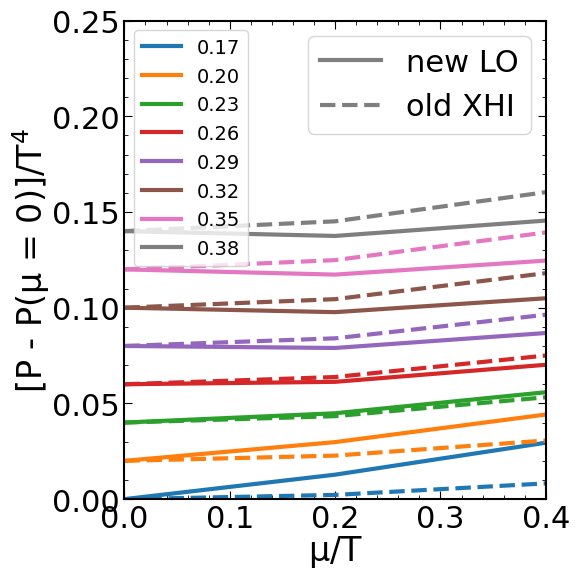

In [19]:

lines = []
for _ in range(8):
    T = Trange[_]
        
    shift = 0.02*_
    l, = plt.plot(murange, shift + (Ps_mu[:, _] - Ps_mu[0, _])/T**4, label='T=%.2f'%(T))
    l2, = plt.plot(murange, shift + (Ps_mu2[:, _] - Ps_mu2[0, _])/T**4, ls='--', c=l.get_c())

    lines += [l]
    # plt.plot(murange, shift + fit_func(sol.x, murange), ls='--', c=l.get_c())
    
    # chis += [sol.x]
plt.legend(fontsize=14)

plt.xlabel('$\mu/T$')
plt.ylabel('[P - P($\mu$ = 0)]/T$^4$')
# plt.savefig('Pmu_fit.pdf', bbox_inches='tight')

plt.ylim(0, 0.25)

leg = plt.legend(lines, ['%.2f'%T for T in Trange],# bbox_to_anchor = [1.2, 1.05], 
                 loc='upper left', fontsize=14)
plt.gca().add_artist(leg)

plt.legend([l, l2], ['new LO', 'old XHI'])
plt.tight_layout()

# plt.savefig('Ps_mu_compare.pdf', bbox_inches='tight')

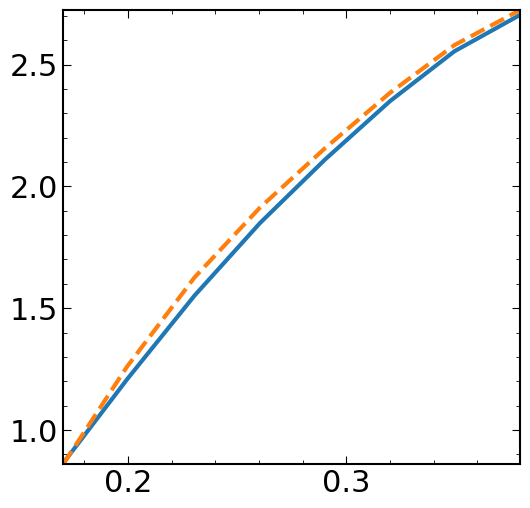

In [20]:
plt.plot(Trange, dfs[2].attrs['Ptot']/Trange**4)
plt.plot(Trange, dfs2[2].attrs['Ptot']/Trange**4, ls='--')

# plt.
# plt.plot(Trange, df_hi.attrs['Ptot']/Trange**4, ls='--')



In [21]:
erange_hi = dfs[0]['170'].attrs['erange']
erange_hi_2b = dfs[0]['170'].attrs['erange2b']

In [22]:
Tkey = '170'

In [23]:
erange2[1] - erange2[0]

0.025000000000000355

In [24]:
erange_hi[1] - erange_hi[0]

0.09999999999999964

In [25]:
dfs[2][Tkey].attrs['qrange']

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

(-0.5, 1.0)

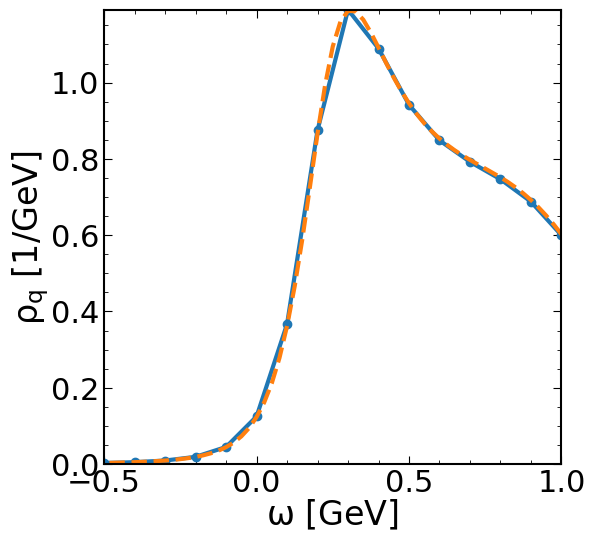

In [26]:
# plt.plot(erange_hi, dfs[2][Tkey]['Q']['S'][:, 0], marker='o')
plt.plot(erange_hi, dfs[2][Tkey]['A']['R'][:, 0], ls='-', marker='o')
# plt.plot(erange2, dfs2[2][Tkey]['Q']['S'][:, 0], ls='--')
plt.plot(erange2, dfs2[2][Tkey]['A']['R'][:, 0], ls='--')

# plt.semilogy()
plt.ylabel(r'$\rho_q$ [1/GeV]')
plt.xlabel(r'$\omega$ [GeV]')
plt.xlim(-.5, 1)

/home/rfrgroup/k.maslov/venv11/lib64/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/rfrgroup/k.maslov/venv11/lib64/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-0.5, 1.0)

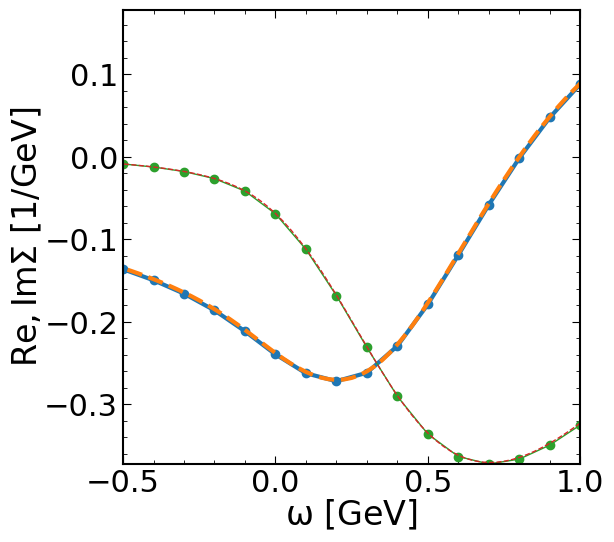

In [27]:
# plt.plot(erange_hi, dfs[2][Tkey]['Q']['S'][:, 0], marker='o')
plt.plot(erange_hi, dfs[2][Tkey]['A']['S'][:, 0], ls='-', marker='o')
# plt.plot(erange2, dfs2[2][Tkey]['Q']['S'][:, 0], ls='--')
plt.plot(erange2, dfs2[2][Tkey]['A']['S'][:, 0], ls='--')

plt.plot(erange_hi, imag(dfs[2][Tkey]['A']['S'][:, 0]), ls='-', marker='o', lw=1)
# plt.plot(erange2, dfs2[2][Tkey]['Q']['S'][:, 0], ls='--')
plt.plot(erange2, imag(dfs2[2][Tkey]['A']['S'][:, 0]), ls='--', lw=1)

# plt.semilogy()

plt.ylabel(r'$Re, Im \Sigma$ [1/GeV]')
plt.xlabel(r'$\omega$ [GeV]')

plt.xlim(-0.5, 1)

(0.2, 0.5)

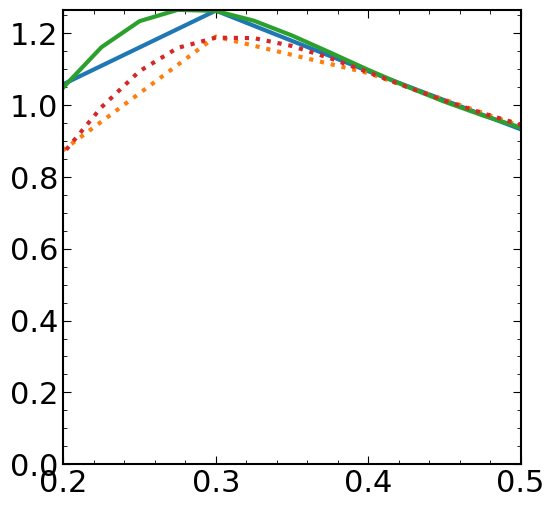

In [28]:
plt.plot(erange_hi, dfs[2][Tkey]['Q']['R'][:, 0])
plt.plot(erange_hi, dfs[2][Tkey]['A']['R'][:, 0], ls=':')
plt.plot(erange2, dfs2[2][Tkey]['Q']['R'][:, 0])
plt.plot(erange2, dfs2[2][Tkey]['A']['R'][:, 0], ls=':')

# plt.semilogy()

plt.xlim(0.2, 0.5)

## Compare the first iteration in two cases

In [29]:
i = 11
Tkey = '170'

In [30]:
iter1 = h5py.File(f'/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu/4pt/0.40/{Tkey}/iter_{i}.hdf5')

In [31]:
iter1 = h5py.File(f'/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu2/{Tkey}/iter_{i}.hdf5')

In [32]:
iter2 = h5py.File(f'/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/4ch_XHI/0.40/{Tkey}/iter_{i}.hdf5')

In [33]:
iter0 = h5py.File(f'/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/4ch_XHI/0.00/{Tkey}/iter_{i}.hdf5')

(0.0, 1.0)

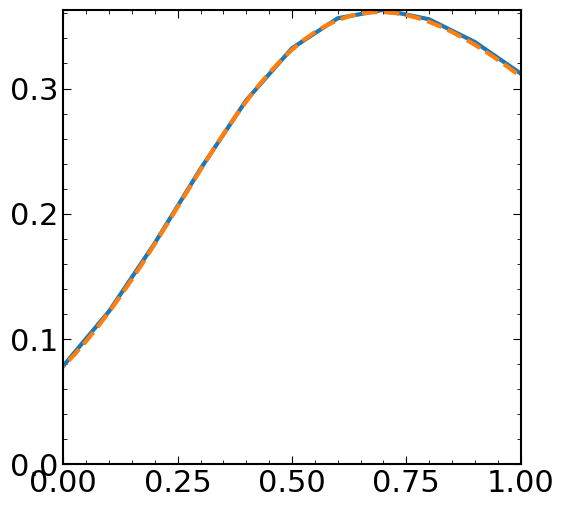

In [34]:
plt.plot(erange, -imag(iter1['Q']['S'][:, 0]))
plt.plot(erange2, -imag(iter2['Q']['S'][:, 0]), ls='--')
# plt.plot(erange2, -imag(iter0['Q']['S'][:, 0]), ls='--')

plt.xlim(0, 1)

# plt.semilogy()

[]

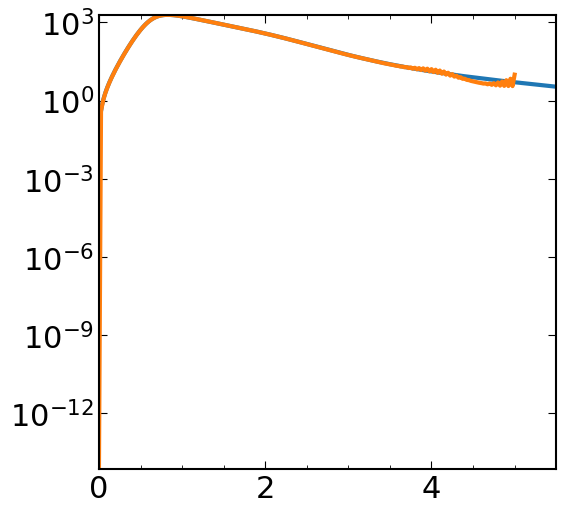

In [35]:
plt.plot(erange_hi_2b, -imag(iter1['TM']['qa1']['0'][:, 0]))
plt.plot(erange2, -imag(iter2['TM']['qa1']['0'][:, 0]))

plt.xlim(0, 5.5)

plt.semilogy()

In [36]:
S = (iter1['Q']['S'][:, 0])

In [37]:
mu = 0.4 * dfs[2]['170'].attrs['T'] / 3
mu

0.0227004

In [38]:
dfs[2]['170'].attrs['mu']

0.0227004

In [39]:
G = 1 / (erange - dfs[2]['170'].attrs['mQ'] - S + mu)

(0.0, 1.0)

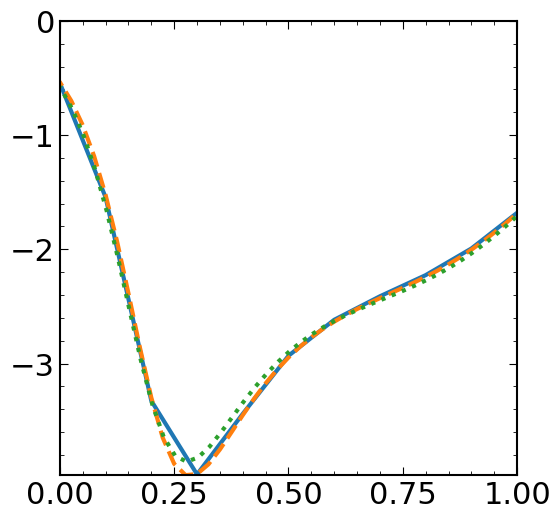

In [40]:
plt.plot(erange, imag(iter1['Q']['G'][:, 0]))

plt.plot(erange2, imag(iter2['Q']['G'][:, 0]), ls='--')
plt.plot(erange2 - mu, imag(iter0['Q']['G'][:, 0]), ls=':')
# plt.plot(erange, imag(G), c='black', ls='--')
plt.xlim(0, 1)

## Compare the converged results

## Compare the $\mu = 0$ case

In [42]:
i = 8
Tkey = '170'

In [43]:
iter1 = h5py.File(f'/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu/4pt/0.00/{Tkey}/iter_{i}.hdf5')

In [44]:
iter2 = h5py.File(f'/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/4ch_XHI/0.00/{Tkey}/iter_{i}.hdf5')

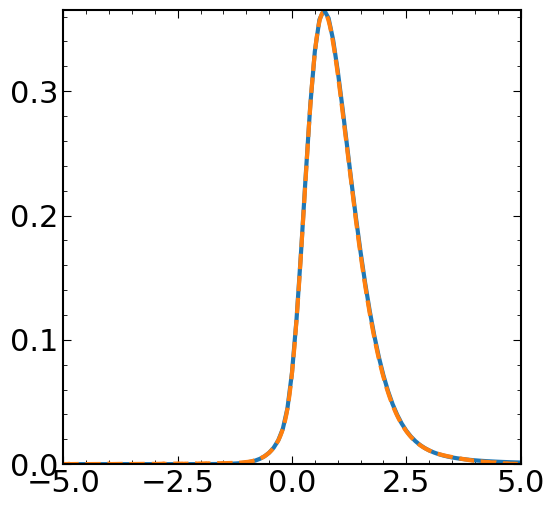

In [45]:
plt.plot(erange, -imag(iter1['Q']['S'][:, 0]))
plt.plot(erange2, -imag(iter2['Q']['S'][:, 0]), ls='--')

# plt.xlim(0, 1)

# plt.semilogy()

(0.0, 5.5)

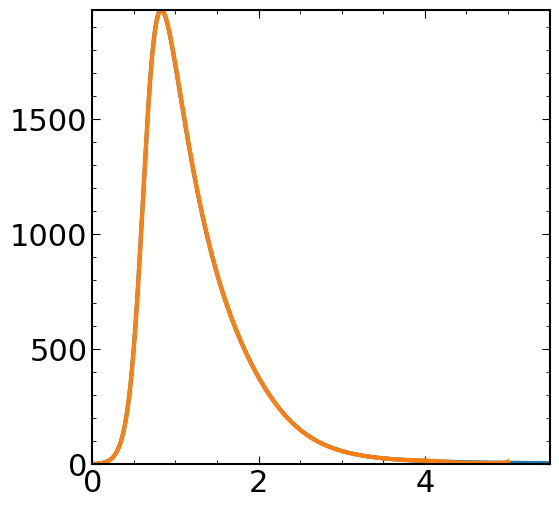

In [46]:
plt.plot(erange_hi_2b, -imag(iter1['TM']['qa1']['0'][:, 0]))
plt.plot(erange2, -imag(iter2['TM']['qa1']['0'][:, 0]))

plt.xlim(0, 5.5)

# plt.semilogy()

(0.0, 3.0)

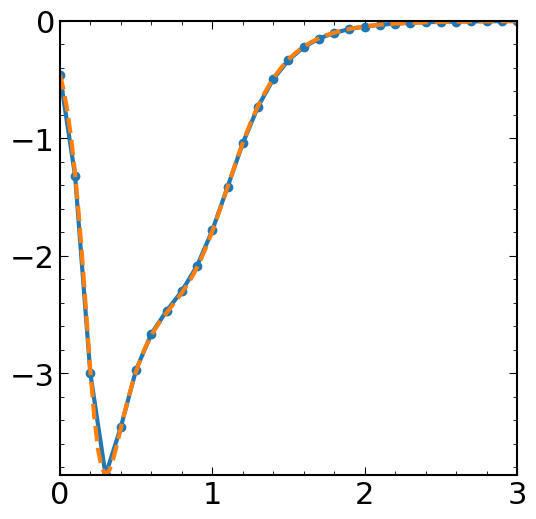

In [47]:
plt.plot(erange, imag(iter1['Q']['G'][:, 0]), marker='o')
plt.plot(erange2, imag(iter2['Q']['G'][:, 0]), ls='--')

plt.xlim(0, 3)

# Compare the LO, HI, XHI at $\mu = 0$

In [48]:
df_lo = h5py.File('/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu2/data.hdf5')

In [49]:
df_hi = h5py.File('/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/HI_parallel/0.40/data.hdf5')['170']

In [50]:
df_xhi = pd.read_csv('/home/rfrgroup/k.maslov/PT.csv')

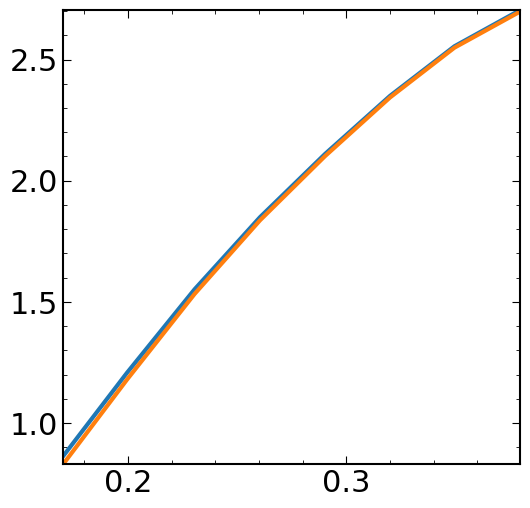

In [51]:
plt.plot(Trange, df_lo.attrs['Ptot']/Trange**4)
# plt.plot(Trange, df_hi.attrs['Ptot']/Trange**4)
plt.plot(Trange, df_xhi['Ptot']/Trange**4)

Text(0.5, 0, '$T [GeV]$')

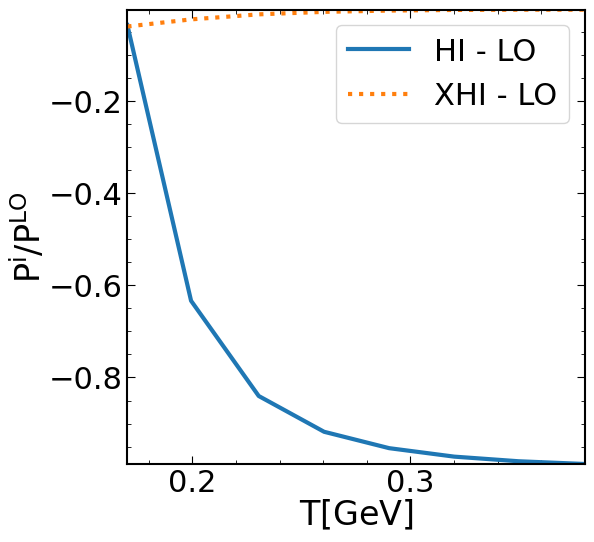

In [53]:
plt.plot(Trange, (df_hi.attrs['Ptot'] - df_lo.attrs['Ptot'])/Trange**4  / (df_lo.attrs['Ptot'] / Trange**4), label='HI - LO')
plt.plot(Trange, (df_xhi['Ptot'] - df_lo.attrs['Ptot'])/Trange**4 / (df_lo.attrs['Ptot'] / Trange**4), ls=':', label='XHI - LO')

plt.legend()

plt.ylabel('$P^{i} / P^{LO}$')

plt.xlabel(r'$T [GeV]$')

## Plots of SFs and stuff

## 

In [71]:
df_xhi0 = h5py.File('/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/4ch_XHI/0.00/data_single_170.hdf5')

In [72]:
erange0 = df_xhi0.attrs['erange']

In [73]:
erange = df_hi['170'].attrs['erange']

KeyError: "Unable to synchronously open object (object '170' doesn't exist)"

KeyError: "Unable to synchronously open object (object '170' doesn't exist)"

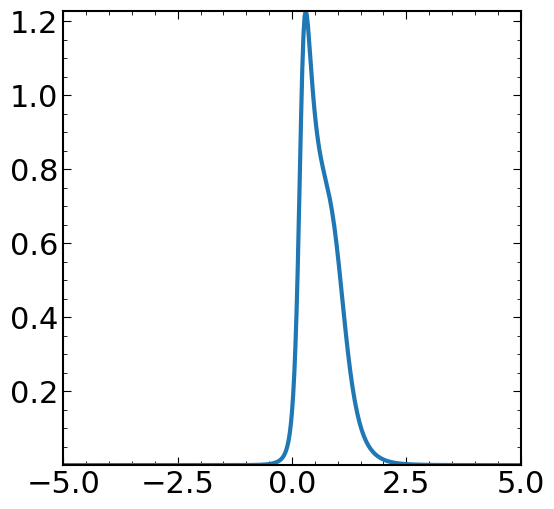

In [58]:
plt.plot(erange0, df_xhi0['Q']['R'][:, 0], label='XHI old')
plt.plot(erange, df_hi['170']['Q']['R'][:, 0], label='HI new', ls='--')

plt.ylabel(r'$\rho_q [GeV^{-1}]$')
plt.xlabel(r'$\omega$ [GeV]')

plt.legend()
plt.semilogy()

In [61]:
erange2b = df_hi['170'].attrs['erange2b']

Text(0.5, 0, '$E$ [GeV]')

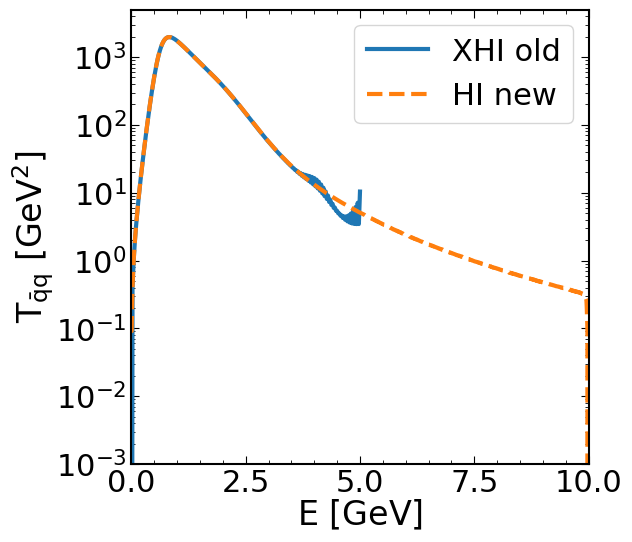

In [62]:
plt.plot(erange0, -imag(df_xhi0['TM']['qa1']['0'][:, 0]), label='XHI old')
plt.plot(erange2b, -imag(df_hi['170']['TM']['qa1']['0'][:, 0]), label='HI new', ls='--')
plt.legend()
plt.semilogy()

plt.xlim(0, 10)

plt.ylim(1e-3, 5e3)


plt.ylabel(r'$T_{\bar q q}$ [GeV$^{2}$]')
plt.xlabel(r'$E$ [GeV]')

## Compare the thermo files

In [59]:
matplotlib.style.use('publication23')

In [60]:
mu = 0.2
Tkey = '170'

In [61]:
th_lo = h5py.File('/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu2/th_data_single_%s.hdf5'%(Tkey))

df_lo = h5py.File('/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu2/data_single_%s.hdf5'%(Tkey))

In [62]:
th_lo = h5py.File('/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu2/0.20/th_data_single_%s.hdf5'%(Tkey))

df_lo = h5py.File('/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu2/0.20/data_single_%s.hdf5'%(Tkey))

In [63]:
th_xhi = h5py.File('/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/4ch_XHI/%.2f/th_data_single_%s.hdf5'%(mu, Tkey))

In [64]:
df_xhi = h5py.File('/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/4ch_XHI/%.2f/data_single_%s.hdf5'%(mu, Tkey))

In [65]:
erange = df_xhi.attrs['erange']

In [66]:
erange_lo = df_lo.attrs['erange']

In [67]:
plt.plot(erange2b, -imag(th_lo['LogT']['qa1']['0'][:, 0]))
plt.plot(erange, -imag(th_xhi['LogT']['qa1']['0'][:, 0]), ls='--')

# plt.semilogy()
# plt.ylim(1e-2, 2e3)

plt.ylabel(r'$T_{\bar q q_1}$ [GeV$^2$]')
plt.xlabel('E [GeV]')

plt.savefig('Tqa_%.2f_%s.pdf'%(mu, Tkey), bbox_inches='tight')

NameError: name 'erange2b' is not defined

Text(0.5, 0, 'E [GeV]')

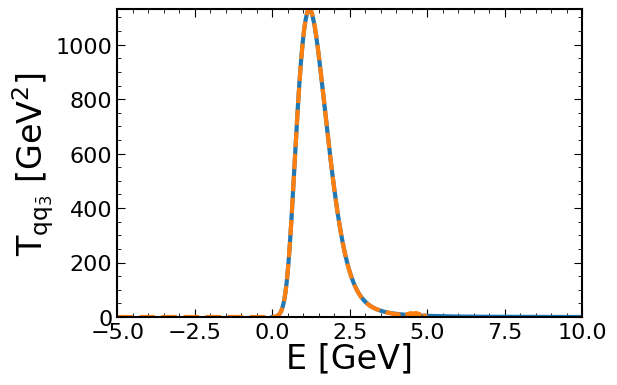

In [334]:
plt.plot(erange2b, -imag(th_lo['LogT']['qq3']['0'][:, 0]))
plt.plot(erange, -imag(th_xhi['LogT']['qq3']['0'][:, 0]), ls='--')

# plt.semilogy()

# plt.ylim(1e-2, 2e3)

plt.ylabel(r'$T_{q q_{\bar 3}}$ [GeV$^2$]')
plt.xlabel('E [GeV]')

# plt.savefig('Tqq_%.2f_%s.pdf'%(mu, Tkey), bbox_inches='tight')

Text(0.5, 0, 'E [GeV]')

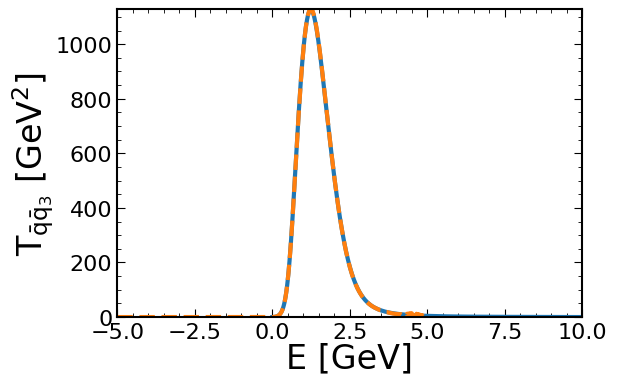

In [335]:
plt.plot(erange2b, -imag(th_lo['LogT']['aa3']['0'][:, 0]))
plt.plot(erange, -imag(th_xhi['LogT']['aa3']['0'][:, 0]), ls='--')

# plt.semilogy()
# plt.ylim(1e-2, 2e3)

plt.ylabel(r'$T_{\bar q \bar q_{3}}$ [GeV$^2$]')
plt.xlabel('E [GeV]')

# plt.savefig('Taa_%.2f_%s.pdf'%(mu, Tkey), bbox_inches='tight')

In [336]:
erange_hi = df_hi.attrs['erange']

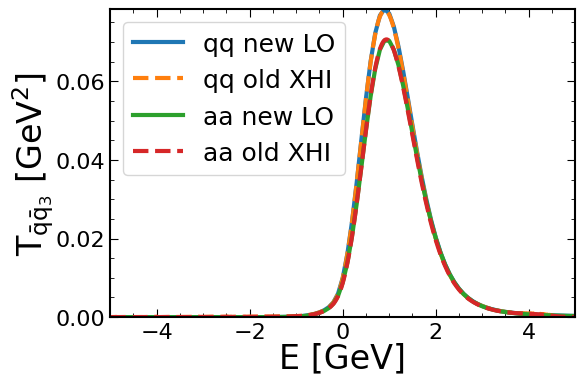

In [338]:
plt.plot(erange_hi, -imag(th_lo['LogS']['QQ'][:, 0]), label='qq new LO')
plt.plot(erange, -imag(th_xhi['LogS']['QQ'][:, 0]), ls='--', label='qq old XHI')

plt.plot(erange_hi, -imag(th_lo['LogS']['AA'][:, 0]), ls='-', label='aa new LO')
plt.plot(erange, -imag(th_xhi['LogS']['AA'][:, 0]), ls='--', label='aa old XHI')


plt.ylabel(r'$T_{\bar q \bar q_{3}}$ [GeV$^2$]')
plt.xlabel('E [GeV]')
plt.legend()
# plt.savefig('S_%.2f_%s.pdf'%(mu, Tkey), bbox_inches='tight')

# plt.semilogy()

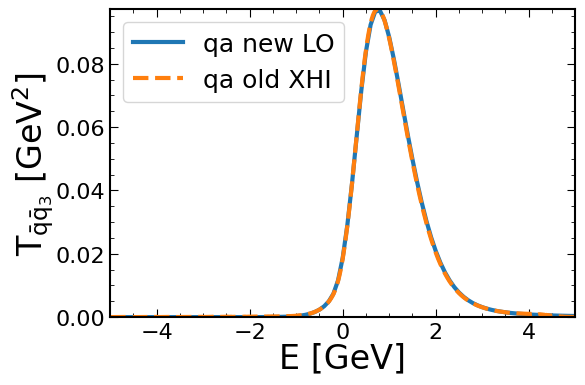

In [341]:
plt.plot(erange_hi, -imag(th_lo['LogS']['QA'][:, 0]), label='qa new LO')
plt.plot(erange, -imag(th_xhi['LogS']['QA'][:, 0]), ls='--', label='qa old XHI')

# plt.plot(erange_hi, -imag(th_hi['LogS']['AA'][:, 0]), ls='-', label='aa new LO')
# plt.plot(erange, -imag(th_xhi['LogS']['AA'][:, 0]), ls='--', label='aa old XHI')


plt.ylabel(r'$T_{\bar q \bar q_{3}}$ [GeV$^2$]')
plt.xlabel('E [GeV]')
plt.legend()
# plt.savefig('S_%.2f_%s.pdf'%(mu, Tkey), bbox_inches='tight')

# plt.semilogy()

[]

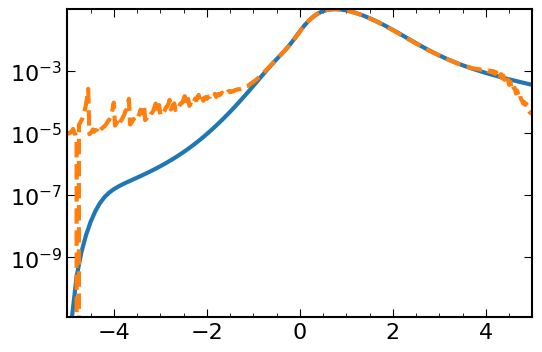

In [345]:
plt.plot(erange_hi, -imag(th_lo['LogS']['QA'][:, 0]))
plt.plot(erange, -imag(th_xhi['LogS']['QA'][:, 0]), ls='--')

plt.semilogy()

(-1.0, 2.0)

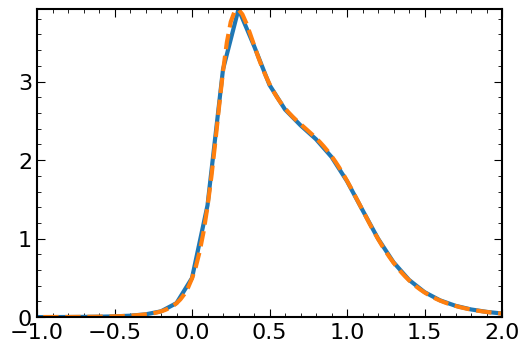

In [346]:
plt.plot(erange_hi, -imag(df_lo['Q']['G'][:, 0]))
plt.plot(erange, -imag(df_xhi['Q']['G'][:, 0]), ls='--')

# plt.semilogy()
plt.xlim(-1, 2)

[]

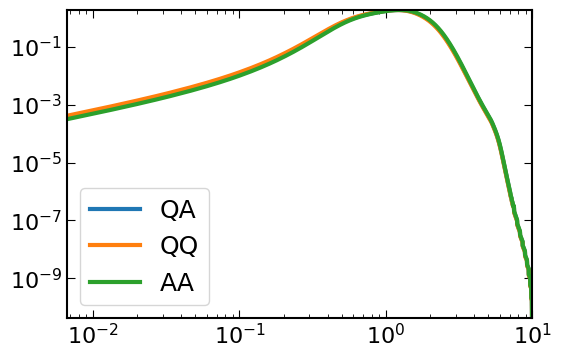

In [347]:
plt.plot(erange2b, -imag(df_lo['G2']['QA'][:, 0]), label='QA')
plt.plot(erange2b, -imag(df_lo['G2']['QQ'][:, 0]), label='QQ')
plt.plot(erange2b, -imag(df_lo['G2']['AA'][:, 0]), label='AA')
# plt.plot(erange, -imag(df_xhi['G2']['QA'][:, 0]), ls='--')
plt.legend()
plt.semilogy()
plt.semilogx()
# plt.ylim(1e-2, 2e3)

In [348]:
qrange2b = df_lo.attrs['qrange2b']

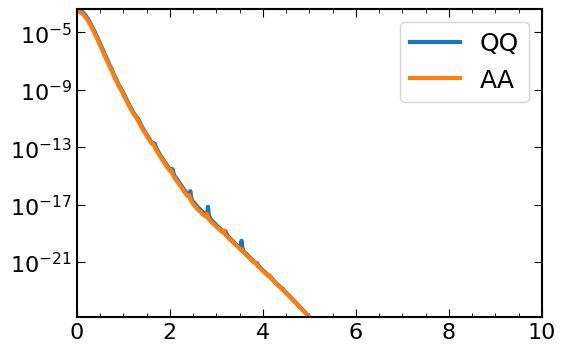

In [349]:
# plt.plot(qrange2b, -imag(df_hi['G2']['QA'][0, :]), label='QA')
plt.plot(qrange2b, -imag(df_lo['G2']['QQ'][0, :]), label='QQ')
plt.plot(qrange2b, -imag(df_lo['G2']['AA'][0, :]), label='AA')

plt.semilogy()
# plt.semilogx()

# plt.semilogy()
plt.legend()

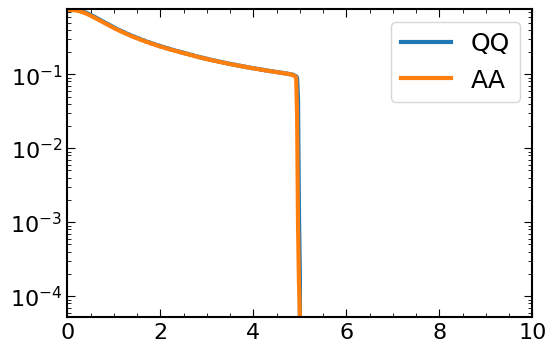

In [352]:
plt.plot(qrange2b, -real(df_lo['G2']['QQ'][0, :]), label='QQ')
plt.plot(qrange2b, -real(df_lo['G2']['AA'][0, :]), label='AA')

# plt.semilogy()
# plt.semilogx()

plt.semilogy()
plt.legend()

In [363]:
th_lo.attrs['Ptot']

array([0.00071199])

In [364]:
th_xhi.attrs['Ptot']

array([0.00071725])

## Compare with $\mu < 0$

In [75]:
df1 = h5py.File('/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu2/data.hdf5')

In [77]:
df1.keys()

<KeysViewHDF5 ['170', '199', '230', '260', '290', '320', '349', '379']>

In [91]:
Tkey = '320'

In [92]:
df2 = h5py.File('/home/rfrgroup/k.maslov/Numerics/TMQGP/ipy/TMQGP/run/run_new/Expand/LO_fixMu2_neg/neg0.40/data.hdf5')

In [93]:
erange = df1[Tkey].attrs['erange']

In [96]:
320 * 0.4 / 3

42.666666666666664

(-1.0, 2.0)

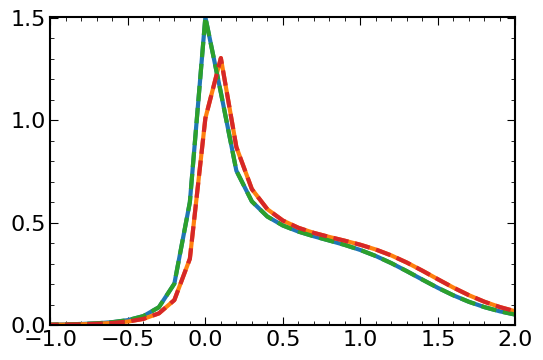

In [94]:
plt.plot(erange, df1[Tkey]['Q']['R'][:, 0])
plt.plot(erange, df2[Tkey]['Q']['R'][:, 0])
plt.plot(erange, df2[Tkey]['A']['R'][:, 0], ls='--')
plt.plot(erange, df1[Tkey]['A']['R'][:, 0], ls='--')
plt.xlim(-1, 2)

In [95]:
df2[Tkey]['Q']['R'][:, 0] - df1[Tkey]['A']['R'][:, 0]

array([ 0.00000000e+00, -1.60825764e-16, -2.64485023e-15, -7.71432395e-15,
       -1.05031762e-14, -8.95065091e-15, -2.22622821e-14, -2.62024369e-14,
       -1.29954325e-13, -5.08238942e-13, -1.18136854e-12, -2.52281177e-12,
       -4.98045651e-12, -8.25657529e-12, -1.37384651e-11, -2.03720514e-11,
       -2.83494533e-11, -3.72890490e-11, -4.60904446e-11, -5.51706080e-11,
       -6.31403282e-11, -7.01273632e-11, -7.37645497e-11, -7.46506081e-11,
       -7.47381754e-11, -6.36047668e-11, -4.89500036e-11, -3.37886698e-11,
        5.58051537e-13,  1.91454328e-11,  1.09609343e-10,  2.13131440e-10,
        3.11915449e-10,  6.04731675e-10,  8.21335320e-10,  1.37342861e-09,
        1.86624249e-09,  2.79853053e-09,  3.91413815e-09,  6.11331392e-09,
        1.02785318e-08,  1.31779131e-08,  1.39708092e-08,  2.38802472e-08,
        2.02072026e-08,  1.14672921e-08,  4.34060945e-08,  3.28183293e-08,
        1.54251194e-07,  1.83821748e-06,  8.21475147e-06, -4.80858175e-06,
       -5.38776490e-06, -

In [90]:
erange2b = df1[Tkey].attrs['erange2b']

[]

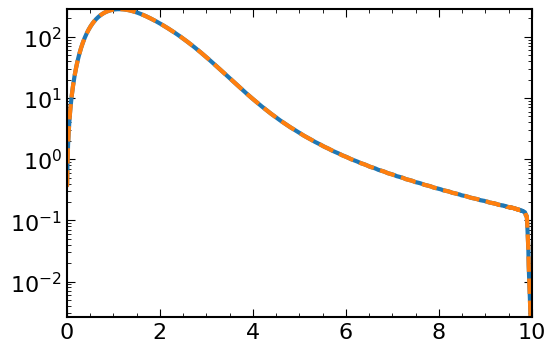

In [102]:
plt.plot(erange2b, -imag(df1[Tkey]['TM']['qa1']['0'][:, 0]))
plt.plot(erange2b, -imag(df2[Tkey]['TM']['qa1']['0'][:, 0]), ls='--')

plt.semilogy()

[]

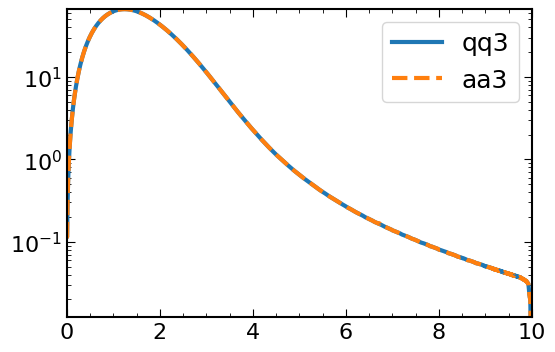

In [106]:
plt.plot(erange2b, -imag(df1[Tkey]['TM']['qq3']['0'][:, 0]), label='qq3')
plt.plot(erange2b, -imag(df2[Tkey]['TM']['aa3']['0'][:, 0]), ls='--', label='aa3')

plt.legend()
plt.semilogy()

In [ ]:
-imag(df1[Tkey]['TM']['qa1']['0'][:, 0])

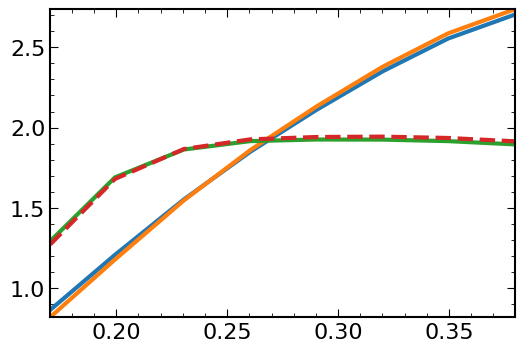

In [113]:
plt.plot(Trange, df1.attrs['Ptot']/Trange**4)
plt.plot(Trange, df2.attrs['Ptot']/Trange**4)

plt.plot(Trange, df1.attrs['P_Q_Q']/Trange**4)
plt.plot(Trange, df2.attrs['P_Q_A']/Trange**4, ls='--')

